In [1]:
! gdown --id 1UtK6apAwWQqs88lHCKQzG55p3tn1smWZ

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1UtK6apAwWQqs88lHCKQzG55p3tn1smWZ
To: /content/training_data.json
100% 13.2k/13.2k [00:00<00:00, 26.0MB/s]


In [2]:
! gdown --id 1vFZFKCbq_3O9waKJ34Ezo8waflkjy1M9

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1vFZFKCbq_3O9waKJ34Ezo8waflkjy1M9
To: /content/validation_data.json
100% 25.3k/25.3k [00:00<00:00, 42.1MB/s]


In [3]:
! gdown --id 102A-iQdVDuG7C612Kwh66nKsYldQ_8Iq

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=102A-iQdVDuG7C612Kwh66nKsYldQ_8Iq
To: /content/test_data.json
100% 8.83k/8.83k [00:00<00:00, 19.1MB/s]


In [4]:
! pip install -U spacy

     |████████████████████████████████| 6.2 MB 13.4 MB/s 
     |████████████████████████████████| 42 kB 926 kB/s 
     |████████████████████████████████| 457 kB 68.6 MB/s 
     |████████████████████████████████| 10.1 MB 47.1 MB/s 
     |████████████████████████████████| 653 kB 64.8 MB/s 
     |████████████████████████████████| 181 kB 61.5 MB/s 
     |████████████████████████████████| 58 kB 4.1 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: smart-open
    Found existing installation: smart-open 6.0.0
    

In [5]:
! python -m spacy info


============================== Info about spaCy ==============================

spaCy version    3.3.0                         
Location         /usr/local/lib/python3.7/dist-packages/spacy
Platform         Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
Python version   3.7.13                        
Pipelines                                      



In [6]:
import spacy
from spacy.tokens import DocBin
from tqdm import tqdm

nlp = spacy.blank("en") # load a new spacy model
db = DocBin() # create a DocBin object

In [7]:
import json
f = open('training_data.json')
TRAIN_DATA = json.load(f)

In [8]:
import json
f = open('validation_data.json')
VALIDATION_DATA = json.load(f)

In [9]:
import json
f = open('test_data.json')
TEST_DATA = json.load(f)

In [10]:
for text, annot in tqdm(TRAIN_DATA['annotations']): 
    doc = nlp.make_doc(text) 
    ents = []
    for start, end, label in annot["entities"]:
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    doc.ents = ents 
    db.add(doc)

db.to_disk("./training_data.spacy") # save the docbin object

100%|██████████| 25/25 [00:00<00:00, 672.54it/s]


In [11]:
for text, annot in tqdm(TRAIN_DATA['annotations']): 
    doc = nlp.make_doc(text) 
    ents = []
    for start, end, label in annot["entities"]:
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    doc.ents = ents 
    db.add(doc)
    db.to_disk("./validation_data.spacy") # save the docbin object

100%|██████████| 25/25 [00:00<00:00, 237.50it/s]


In [12]:
for text, annot in tqdm(TEST_DATA['annotations']): 
    doc = nlp.make_doc(text) 
    ents = []
    for start, end, label in annot["entities"]:
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    doc.ents = ents 
    db.add(doc)
    db.to_disk("./test_data.spacy") # save the docbin object

100%|██████████| 26/26 [00:00<00:00, 156.56it/s]


In [13]:
!python -m spacy init config config.cfg --lang en --pipeline ner --optimize efficiency

⚠ To generate a more effective transformer-based config (GPU-only),
install the spacy-transformers package and re-run this command. The config
generated now does not use transformers.
ℹ Generated config template specific for your use case
- Language: en
- Pipeline: ner
- Optimize for: efficiency
- Hardware: CPU
- Transformer: None
✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [14]:
!python -m spacy train config.cfg --output ./ --paths.train ./training_data.spacy --paths.dev ./validation_data.spacy

ℹ Saving to output directory: .
ℹ Using CPU

=========================== Initializing pipeline ===========================
[2022-04-30 09:58:35,951] [INFO] Set up nlp object from config
[2022-04-30 09:58:35,962] [INFO] Pipeline: ['tok2vec', 'ner']
[2022-04-30 09:58:35,966] [INFO] Created vocabulary
[2022-04-30 09:58:35,967] [INFO] Finished initializing nlp object
[2022-04-30 09:58:36,361] [INFO] Initialized pipeline components: ['tok2vec', 'ner']
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     41.17    6.45    5.03    8.99    0.06
 11     200        173.99   1754.00   97.74   98.30   97.19    0.98
 26     400        147.24     90.73   99.72  100.00   99.44    1.00
 44     600         92.08     65.81   99.72   99

In [15]:
!python -m spacy evaluate ./model-best ./test_data.spacy --output ./result.json

ℹ Using CPU

================================== Results ==================================

TOK     100.00
NER P   85.68 
NER R   75.73 
NER F   80.40 
SPEED   9298  


=============================== NER (per type) ===============================

                        P       R       F
CANDIDATEVARIABLE   85.68   75.73   80.40

✔ Saved results to result.json


In [23]:
nlp = spacy.load("./model-best")

In [24]:
docs = TEST_DATA


In [18]:
from spacy.training import offsets_to_biluo_tags
def get_cleaned_label(label: str):
    if "-" in label:
        return label.split("-")[1]
    else:
        return label
    
def create_total_target_vector(docs):
    target_vector = []
    for doc in docs['annotations']:
        print (doc)
        new = nlp.make_doc(doc[0])
        entities = doc[1]["entities"]
        bilou_entities = offsets_to_biluo_tags(new, entities)
        final = []
        for item in bilou_entities:
            final.append(get_cleaned_label(item))
        target_vector.extend(final)
    return target_vector

def create_prediction_vector(text):
      return [get_cleaned_label(prediction) for prediction in get_all_ner_predictions(text)]

def create_total_prediction_vector(docs: list):
    prediction_vector = []
    for doc in docs['annotations']:
        prediction_vector.extend(create_prediction_vector(doc[0]))
    return prediction_vector

def get_all_ner_predictions(text):
    doc = nlp(text)
    entities = [(e.start_char, e.end_char, e.label_) for e in doc.ents]
    bilou_entities = offsets_to_biluo_tags(doc, entities)
    return bilou_entities

In [19]:
def get_model_labels():
    labels = list(nlp.get_pipe("ner").labels)
    labels.append("O")
    return sorted(labels)
def get_dataset_labels():
    return sorted(set(create_total_target_vector(docs)))

In [20]:
from sklearn.metrics import confusion_matrix

def generate_confusion_matrix(docs): 
    classes = sorted(set(create_total_target_vector(docs)))
    y_true = create_total_target_vector(docs)
    y_pred = create_total_prediction_vector(docs)
    print (y_true)
    print (y_pred)
    return confusion_matrix(y_true, y_pred)

In [21]:
from matplotlib import pyplot
import numpy

def plot_confusion_matrix(docs, classes, normalize=False, cmap=pyplot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
   
    title = 'Confusion Matrix, for SpaCy NER'

    # Compute confusion matrix
    cm = generate_confusion_matrix(docs)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]

    fig, ax = pyplot.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=numpy.arange(cm.shape[1]),
           yticks=numpy.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    pyplot.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm, ax, pyplot

['Of the eight deceased, five were male and three were female.\r', {'entities': [[13, 21, 'CANDIDATEVARIABLE'], [33, 37, 'CANDIDATEVARIABLE'], [53, 59, 'CANDIDATEVARIABLE']]}]
['Of the eight deceased, five were male and three were female.\r', {'entities': [[13, 21, 'CANDIDATEVARIABLE'], [33, 37, 'CANDIDATEVARIABLE'], [53, 59, 'CANDIDATEVARIABLE']]}]
['At least 897 new infections were recorded and four people died from Covid-19 in 24 hours till 8:00 am today.\r', {'entities': [[17, 27, 'CANDIDATEVARIABLE'], [33, 41, 'CANDIDATEVARIABLE'], [51, 57, 'CANDIDATEVARIABLE']]}]
['A total of 21,543 samples were tested across the country in the 24 hours.\r', {'entities': [[18, 25, 'CANDIDATEVARIABLE'], [49, 56, 'CANDIDATEVARIABLE'], [67, 72, 'CANDIDATEVARIABLE']]}]
['Djokovic was deported on the eve of the Australian Open in January and on Monday lost his number one ranking to Russian Daniil Medvedev.\r', {'entities': [[90, 96, 'CANDIDATEVARIABLE'], [101, 108, 'CANDIDATEVARIABLE']]}]
['Bangladesh

(array([[ 15, 129],
        [ 78, 617]]),
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>)

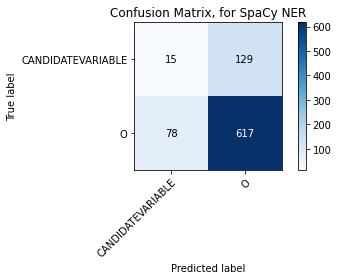

In [22]:
plot_confusion_matrix(docs,classes=get_dataset_labels(),normalize=False)